## Udacity Data Analyst Project 1 (Using R)
In this project, I am going to use the data given by udacity in the Data Analyst course to create a replica of the project I passed using R programming language. The procedure will be the same with the one I did using Python language but the language will differ.
I will start by importing the libraries I need in the following cell. I am open to all your recommendations and corrections. thank you.

In [24]:
# Reading the csv file and assigning it to a variable
data <- read.csv("noshow.csv")

In [2]:
# Take a look at the structure of the dataframe
str(data)

'data.frame':	110527 obs. of  14 variables:
 $ PatientId     : num  2.99e+13 5.59e+14 4.26e+12 8.68e+11 8.84e+12 ...
 $ AppointmentID : int  5642903 5642503 5642549 5642828 5642494 5626772 5630279 5630575 5638447 5629123 ...
 $ Gender        : Factor w/ 2 levels "F","M": 1 2 1 1 1 1 1 1 1 1 ...
 $ ScheduledDay  : Factor w/ 103549 levels "2015-11-10T07:13:56Z",..: 27742 27504 27539 27709 27498 20074 21386 21496 24945 20895 ...
 $ AppointmentDay: Factor w/ 27 levels "2016-04-29T00:00:00Z",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Age           : int  62 56 62 8 56 76 23 39 21 19 ...
 $ Neighbourhood : Factor w/ 81 levels "AEROPORTO","ANDORINHAS",..: 40 40 47 55 40 59 26 26 2 13 ...
 $ Scholarship   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Hipertension  : int  1 0 0 0 1 1 0 0 0 0 ...
 $ Diabetes      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ Alcoholism    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Handcap       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SMS_received  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ No.show       : Factor w/ 2 lev

In [3]:
# Looking at the general information of the data
summary(data)

   PatientId         AppointmentID     Gender                  ScheduledDay   
 Min.   :3.922e+04   Min.   :5030230   F:71840   2016-05-06T07:09:54Z:    24  
 1st Qu.:4.173e+12   1st Qu.:5640286   M:38687   2016-05-06T07:09:53Z:    23  
 Median :3.173e+13   Median :5680573             2016-04-25T17:17:46Z:    22  
 Mean   :1.475e+14   Mean   :5675305             2016-04-25T17:18:27Z:    22  
 3rd Qu.:9.439e+13   3rd Qu.:5725524             2016-04-25T17:17:23Z:    19  
 Max.   :1.000e+15   Max.   :5790484             2016-04-25T17:19:03Z:    15  
                                                 (Other)             :110402  
              AppointmentDay       Age                 Neighbourhood  
 2016-06-06T00:00:00Z: 4692   Min.   : -1.00   JARDIM CAMBURI : 7717  
 2016-05-16T00:00:00Z: 4613   1st Qu.: 18.00   MARIA ORTIZ    : 5805  
 2016-05-09T00:00:00Z: 4520   Median : 37.00   RESISTÃŠNCIA   : 4431  
 2016-05-30T00:00:00Z: 4514   Mean   : 37.09   JARDIM DA PENHA: 3877  
 2016-06-08T0

## Cleaning the Qualitative Variable
The only Quantitative variable in the dataframe is Age, therefore, it is the only variable that may have have outliers in this case, hence we are going to be checking only Age for outliers Using Inter Quatile Range (IQR) Score.

In [4]:
# Check for duplicates
data[duplicated(data),]

PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show


In [5]:
# Now lets check for NA values and replace them with the mean Age
data$Age[is.na(data$Age)] <- median(data$Age)

In [48]:
# Replace ages lessthan 1 and greater than 100 with the mean
data$Age[data$Age < 1] <-  median(data$Age)
data$Age[data$Age > 100] <- median(data$Age)

In [7]:
# Look at the summary of age again
summary(data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   20.00   37.00   38.27   55.00  100.00 

It can be seen in the summary above that the minimum age is -1 and maximum is 115. To clean the outliers we are going to use Flooring and Capping to find the outliers and we will replace the them with the median, this is because the mean is affected by the outliers while the median is not.
### Dropping unusable columns
The columns "AppointmentID", 'PatientId', 'ScheduledDay' and 'Neighbourhood' are not going to be used in the analysis, therefore we are going to drop them.

In [8]:
# Remove AppointmentID, AppointmentDay, ScheduledDay and Neighbourhodd columns
data$AppointmentID <- NULL
data$AppointmentDay <- NULL
data$ScheduledDay <- NULL
data$Neighbourhood <- NULL

In [9]:
# Take a look at the dataset
head(data, 10)

PatientId,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No.show
2.987250e+13,F,62,0,1,0,0,0,0,No
5.589978e+14,M,56,0,0,0,0,0,0,No
4.262962e+12,F,62,0,0,0,0,0,0,No
8.679512e+11,F,8,0,0,0,0,0,0,No
8.841186e+12,F,56,0,1,1,0,0,0,No
9.598513e+13,F,76,0,1,0,0,0,0,No
7.336882e+14,F,23,0,0,0,0,0,0,Yes
3.449833e+12,F,39,0,0,0,0,0,0,Yes
5.639473e+13,F,21,0,0,0,0,0,0,No
7.812456e+13,F,19,0,0,0,0,0,0,No


### Exploratory Analysis
Now that we've cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.
### Research Question 1: Is recieving sms associated with showing up for the appointment?

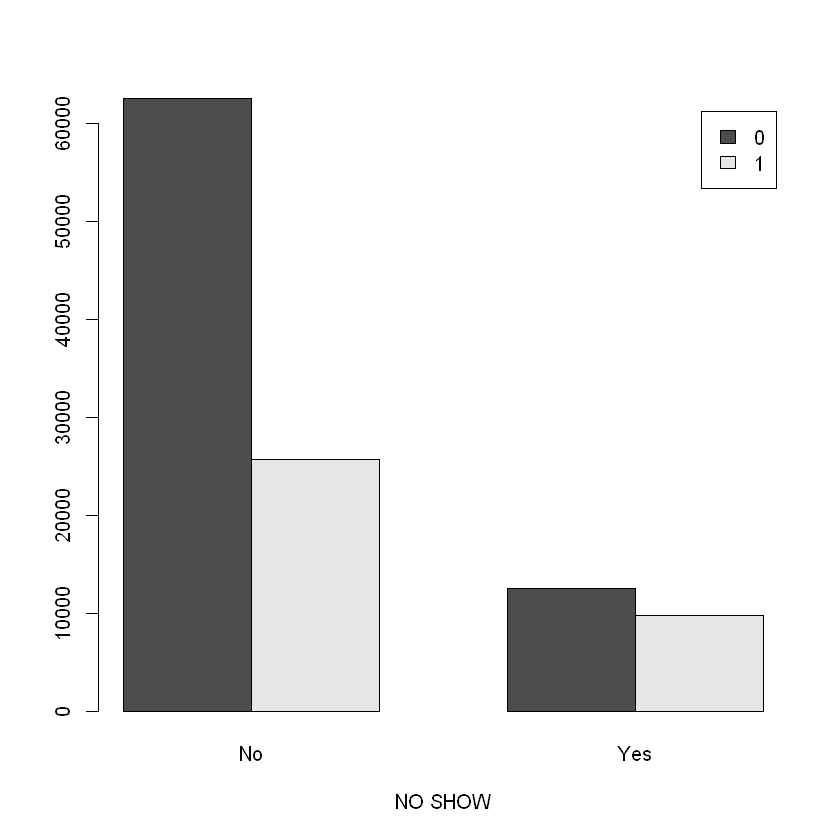

In [45]:
tbl <- with(data, table(SMS_received, No.show))

barplot(tbl, beside = TRUE, legend = TRUE, xlab = "NO SHOW")

In the above barchart, It appears that most of those that show up for the appointment did not recieve sms and they are significantly higher than those that recieved sms and showed for the appointment. In turn, those that did not recieve sms and did not show up are a little bit higher than those that recieved SMS and did not show up.Therefore, I would say; recieving sms is not an imfortant factor in predicting those that will show up for their appointment. Hence it has no relationship with showing up for the appointment.

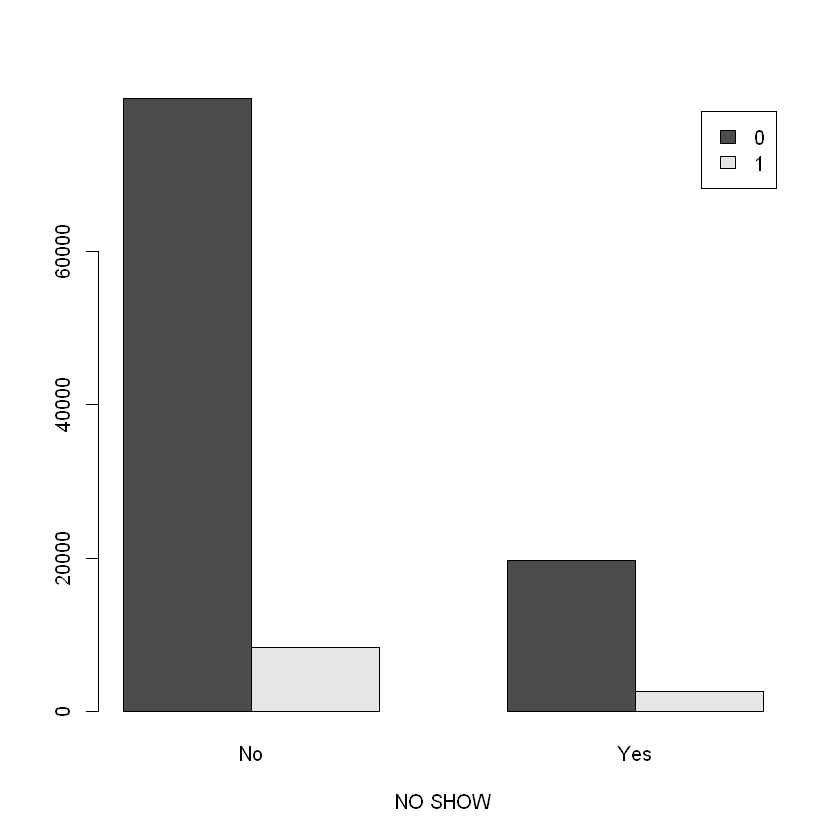

In [46]:
tbl <- with(data, table(Scholarship, No.show))

barplot(tbl, beside = TRUE, legend = TRUE, xlab = "NO SHOW")

Going by the above, most of the patients that showed for the appoitment are those without scholarship which is significantly higher than those with scholarship. but for the scholarship being limited, ration should be taken to understand if the scholarship attracts more show up. this shows that there exist some postive relatioinship between scholarship and showing up for appointments, and this makes scholarship an important factor in predicting show up.

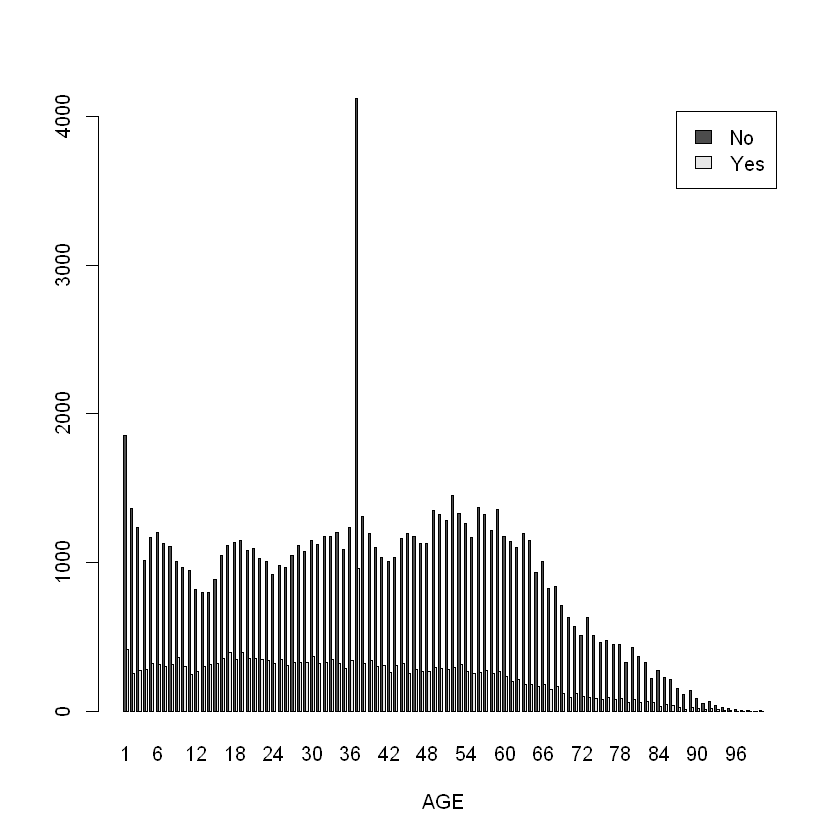

In [55]:
tbl <- with(data, table(No.show, Age))

barplot(tbl, beside = TRUE, legend = TRUE, xlab = "AGE")

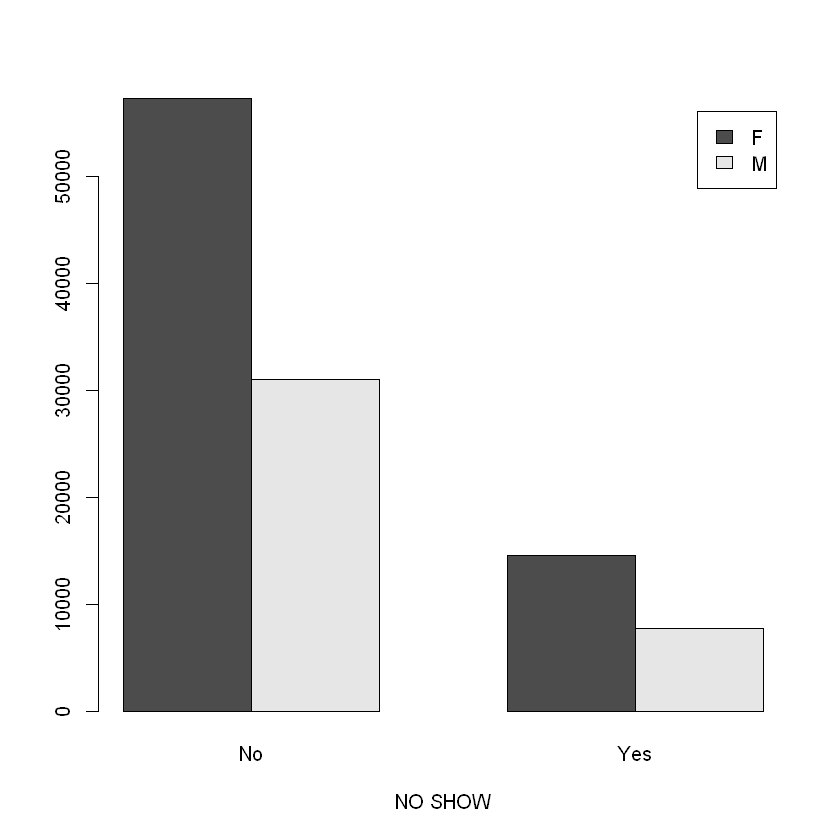

In [56]:
tbl <- with(data, table(Gender, No.show))

barplot(tbl, beside = TRUE, legend = TRUE, xlab = "NO SHOW")

Regarding the gender, the Females show up most for the appointment, and the ration to which males missed appointment is higher than that of the females. In short we can say that, the females are much more functual in showing up for appointments. The age distribution showed that,patients around 35-36 years of age showed up most, followed children between 0 - 10 years show up for the appointments more than all other age groups, followed by those between 55 and 60, while the elderly comes last.

### Do patients with specific illness show more than others?
To answer this question we need to find out the number of patients with specific illness and compare their rate of showing for appointments, to do this we will create four instances for each condition as below.

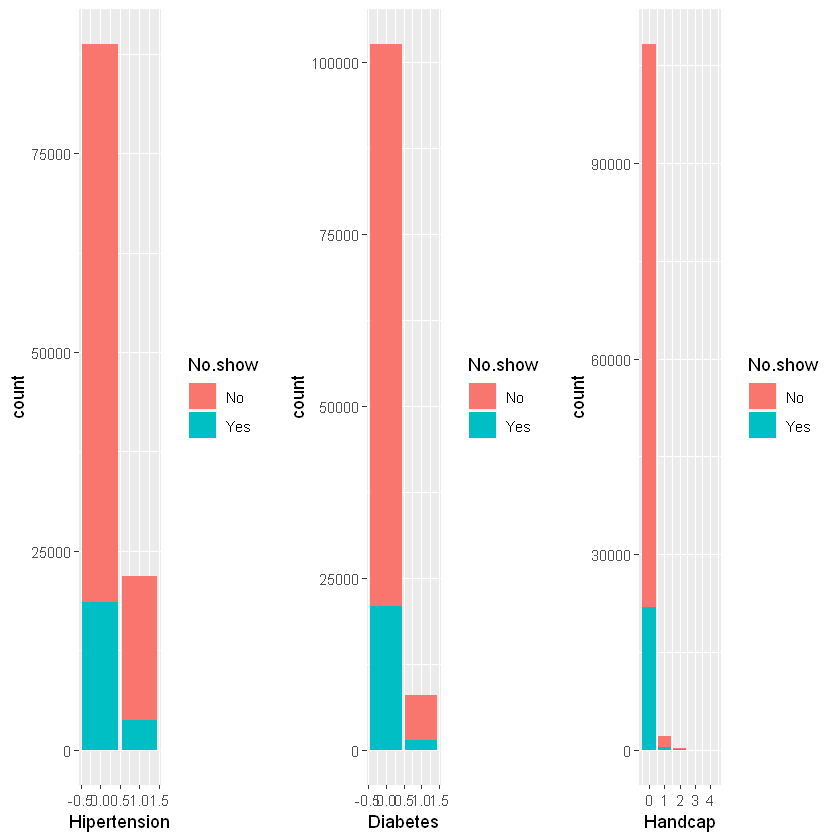

In [76]:
library(Rmisc)
p1 <- ggplot(data, aes(x = Hipertension, fill = No.show))+
    geom_bar(position = 'stack')
p2 <- ggplot(data, aes(x = Diabetes, fill = No.show))+
    geom_bar(position = 'stack')
p3 <- ggplot(data, aes(x = Handcap, fill = No.show))+
    geom_bar(position = 'stack')

multiplot(p1,p2,p3, cols = 3)

### Conclusions
Based on the analysis presented, it maybe concluded that, looking at the percentage of patients with scholarship, they appear to be showing up for appointments more than those without. It also appears that patients show up mostly on Wednesday. Also, Young and medium aged people may show up for their appointments more than elderly. patients with Hipertension appear to showup more than those with other medical conditions. The project may come up with short comings such as the presentation and plots, and that maybe as a result of my little experiance in the working with analysis.

### Limitations
#### Number of appointments in a day was not considered
In the analysis of appointment days, number of appointments per each is not considered in the analysis, and that may be a problem which may result in wrong analysis as the number of appointments differ by days.

#### The ratio of Male to Female population is also not considered
In the gender chart, we based the analysis on the rate of show of males and females, and this may cause wrong analysis because the number of females may exceed the number of males and vice verca.